<a href="https://colab.research.google.com/github/happyssun96/stat_AI/blob/main/kartrush%2B_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy, cv2, os, re, pandas
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
src_img_location = "/content/gdrive/My Drive/kartrushplus/"

Mounted at /content/gdrive


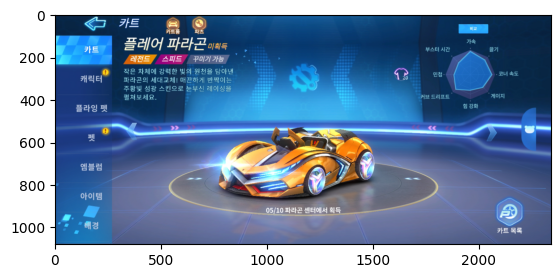

In [3]:
#FIXME
input_name = "플레어파라곤"

src_image = cv2.imread(src_img_location + input_name + ".jpg", cv2.IMREAD_COLOR)
src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)

#Show imgage with matplitlib
plt.imshow(src_image)
plt.show()

In [4]:
src_image.shape

(1080, 2340, 3)

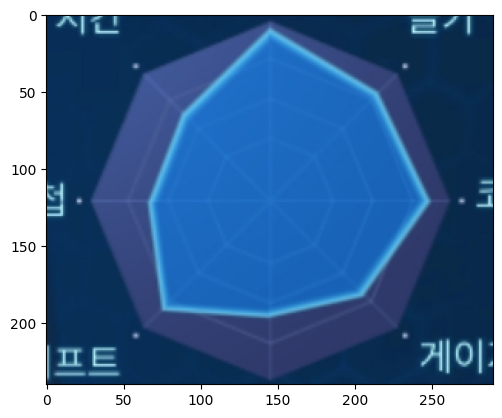

In [5]:
stat_roi = src_image[160:400, 1810:2100]
plt.imshow(stat_roi)
plt.show()

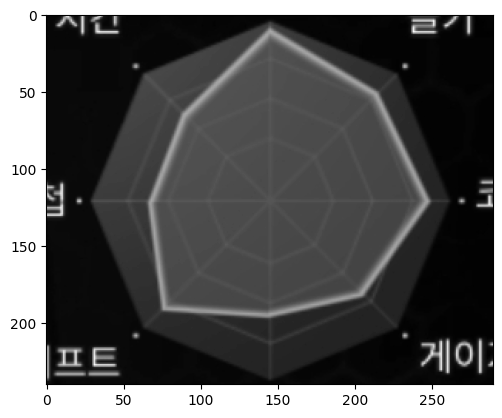

In [6]:
stat_roi_gray = cv2.cvtColor(stat_roi, cv2.COLOR_RGB2GRAY)
plt.imshow(stat_roi_gray, cmap="gray")
plt.show()

In [7]:
ret, thresh = cv2.threshold(stat_roi_gray, 127, 255, 0)
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_idx = 0
max_area = 0

for i, contour in enumerate(contours):
  area = cv2.contourArea(contour)
  if area > max_area:
    max_area = area
    max_idx = 1

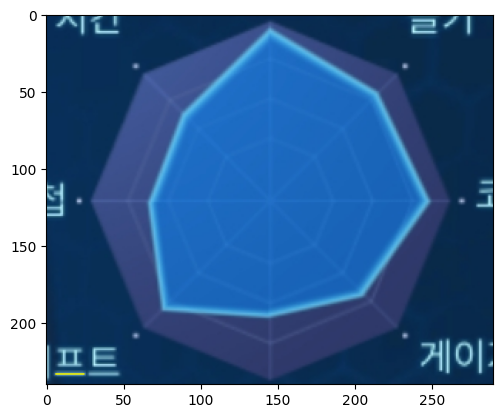

플레어파라곤 's stat :  23572.0


In [8]:
cv2.drawContours(stat_roi, [contours[max_idx]], 0, (255, 255, 0), 1)

plt.imshow(stat_roi)
plt.show()

print(input_name, "'s stat : ", max_area)

In [9]:
def calculate_stat(input_img):
  src_image = cv2.imread(src_img_location + input_img + ".jpg", cv2.IMREAD_COLOR)
  src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
  stat_roi = src_image[160:400, 1810:2100]
  stat_roi_gray = cv2.cvtColor(stat_roi, cv2.COLOR_RGB2GRAY)
  ret, thresh = cv2.threshold(stat_roi_gray, 127, 255, 0)
  contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  max_idx = 0
  max_area = 0
  for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
      max_area = area
      max_idx = 1
  cv2.drawContours(stat_roi, [contours[max_idx]], 0, (255, 255, 0), 1)
  return stat_roi, max_area

In [10]:
kart_list = os.listdir(src_img_location)
kart_list = [re.sub('.jpg+', '', _) for _ in kart_list]
print(kart_list)

stat_dict = {}

for kart in kart_list:
  _, area = calculate_stat(kart)
  stat_dict[kart] = area


['슈퍼마라톤', '스위피', '사이버버스트', '타이칸4S', '윈드솔리드', '능력자다오', '제노', '연습카트', '클래식코튼', '파라곤', '섀도쉐퍼', '클래식세이버', '퍼플미티어', '쉐퍼', '핑크스쿠터', '솔라', '동화나라디지니', '럭셔리스파이더', '쏘나타NLine', '청월검', '티라노', '타이탄', '흑기사', '세이버헬파이어', '부티', '광속배찌', '비룡도', '골든연습카트', '브루터스', '타다오택시', '클래식솔리드', '클래식버스트', '클래식마라톤', '3레벨헬멧', '이아페토스', '프라이팬', '제트스케이트보드', '하이퍼미티어', '나이트이글', '몬스터', '황금마차', '스플릿윈드', '카오스', '렉키', '마법양탄자', '바스테트', '진라면카트', '저스티스바이크', '금색굴렁쇠', '카카오T블루', '골든박스터', '호랑이', '멘티스', '카카오T바이크', '웨이브', '슬릭벤져', '다크윙', 'BMW R 18', '황구', '골든세이버', '스타쉽 솔리드', '궁니르', '몰랑몰랑몰리', '전쟁신의마차', '스토커', '뛰라이언', '춘식이카트', '팬더레인저 신화', '로디파이론', '파라ᄀ

In [11]:
df = pandas.DataFrame(list(stat_dict.items()), columns= ['이름', '스탯 총합'])
df = df.sort_values(by=['스탯 총합'], ascending = False)
pandas.set_option("display.max_rows", None, "display.max_columns", None)
from IPython.display import display, HTML

display(HTML(df.to_html()))


,이름,스탯 총합
113,플레어파라곤,23572.0
110,스칼렛바이퍼,22573.0
105,황금기사영웅,21618.5
100,드래곤세이버,20706.0
108,맥라렌GT3,20419.0
95,아르테미스,20329.5
107,맥라렌,20241.0
91,플라즈마GT,19484.5
103,프로즌몬스터,19069.5
83,슈퍼코튼,18634.0
